In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot

from scipy.interpolate import interp2d
import scipy.interpolate
from scipy import ndimage

from plotbin.sauron_colormap import register_sauron_colormap

Lê a tabela com os dados gerados pelo Ppxf.
x e y são arrays com os valores da posição em que o espectro foi extraido.
dis é um array com o valor da dispersão em cada px.
x, y e dis devem ter o mesmo tamanho.

In [20]:
entrada = np.loadtxt('Output_Ppxf.txt')
y = []
x = []
dis = []
for i in range(100):
    y.append(entrada[i][0])
    x.append(entrada[i][1]) 
    dis.append(entrada[i][3])
x_new = np.transpose(x) #Transpõe o array, pedido pelo código.
y_new = np.transpose(y)
dis_new = np.transpose(dis)

Função que realiza o plot do mapa de dispersão. Código original é o plotbin, desenvolvido por Cappellari.

In [21]:
def plot_velfield(x, y, vel, vmin=None, vmax=None, ncolors=64,
                  nodots=False, colorbar=False, linescolor='k', label=None, 
                  flux=None, nticks=7, markersize=3, cmap=plt.cm.hot, **kwargs):

    x, y, vel, flux = map(np.ravel, [x, y, vel, flux])

    assert x.size == y.size == vel.size, 'The vectors (x, y, vel) must have the same size'

    if cmap in ['sauron', 'sauron_r']:
        register_sauron_colormap()

    if vmax is None and vmin is None:
        vmin, vmax = np.min(vel), np.max(vel)
        extend = 'neither'
    elif vmax is None:
        vmax = np.max(vel)
        extend = 'min'
    elif vmin is None:
        vmin = np.min(vel)
        extend = 'max'
    else:
        extend = 'both'

    levels = np.linspace(vmin, vmax, ncolors)

    ax = plt.gca()

    cnt = ax.tricontourf(x, y, vel, levels=levels, cmap=cmap, extend=extend, **kwargs)

    for c in cnt.collections:    # Remove white gaps in contour levels of PDF
        c.set_edgecolor("face")  # http://stackoverflow.com/a/32911283/

    ax.axis('image')  # Equal axes and no rescaling
    ax.minorticks_on()
    ax.tick_params(length=10, which='major')
    ax.tick_params(length=5, which='minor')

    if flux[0] is not None:
        ax.tricontour(x, y, -2.5*np.log10(flux/np.max(flux).ravel()),
                      levels=np.arange(20), colors=linescolor)  # 1 mag contours

    if not nodots:
        ax.plot(x, y, '.k', markersize=markersize, **kwargs)

    if colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        ticks = MaxNLocator(nticks).tick_values(vmin, vmax)
        cbar = plt.colorbar(cnt, cax=cax, ticks=ticks)
        if label is not None:
            cbar.set_label(label)
        plt.sca(ax)  # Activate main plot before returning

    return cnt

Realiza o plot chamando a função acima e passando os dados coletados da tabela como parâmetros.

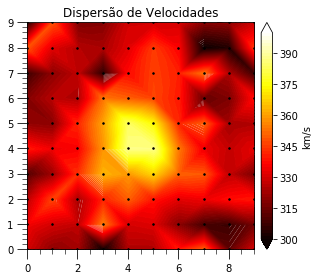

In [22]:
plt.clf()
plt.title('Dispersão de Velocidades')
plot_velfield(x_new,y_new, dis_new,vmin=300, vmax=400, colorbar=True, label='km/s')
plt.tight_layout()
plt.show()

Abaixo encontram-se outros dois tipos de mapa de dispersão, desta vez podendo-se escolher o tipo de interpolação.

In [23]:
xi, yi = np.linspace(x_new.min(), x_new.max(), 64), np.linspace(y_new.min(), y_new.max(), 100)

In [24]:
xi, yi = np.meshgrid(xi, yi)

In [25]:
rbf = scipy.interpolate.Rbf(x_new, y_new, dis_new, function='thin_plate')
zi = rbf(xi, yi)

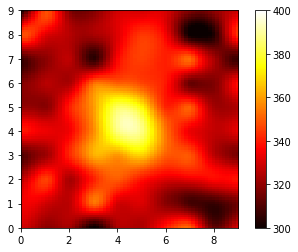

In [26]:
plt.imshow(zi, vmin=300, vmax=400, origin='lower',
           extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], cmap=plt.cm.hot)
#plt.scatter(x_new, y_new, c=dis_new, cmap=plt.cm.hot)
plt.colorbar()
plt.show()

In [27]:
xi, yi = np.linspace(x_new.min(), x_new.max(), 64), np.linspace(y_new.min(), y_new.max(), 300)
xi, yi = np.meshgrid(xi, yi)

In [28]:
zi = scipy.interpolate.griddata((x_new, y_new), dis_new, (xi, yi), method='cubic')

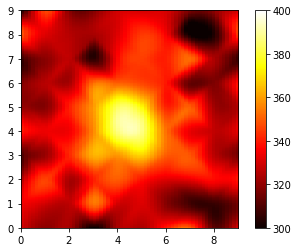

In [29]:
plt.imshow(zi, vmin=300, vmax=400, origin='lower',
           extent=[x_new.min(), x_new.max(), y_new.min(), y_new.max()], cmap=plt.cm.hot)
plt.colorbar()
plt.show()